# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Métricas para seleção de modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Importando modelos a serem utilizados
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Funções auxiliares para elaboração dos modelos de regressão linear
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from scipy.stats import norm
from scipy.stats import uniform

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Exercício 02

## Função de Perda Quadrática (MSE)

Utilizada em problemas de regressão  quando queremos penalizar erros de previsão muito grandes. Erros pequenos tem seu peso diminuído, o que é relevante quando queremos minimizar os erros mais significativos.

## Função de Perda Absoluta (MAE)

Utilizada em problemas de regressão quando precisamo de uma função de perda robusta a *outliers*. Todos os erros são tratados de forma linear, fazendo com que erros de previsão muito grandes não sejam tão penalizados quanto no MSE. O impacto de erros maiores e menores é semelhante, com ambos sendo penalizados de maneira linear.

Além disso, esta função é a que possui maior interpretabilidade, uma vez que a unidade de medida do erro continua na mesma unidade de medida da variável resposta, levando a resultados mais interpretáveis.

## Função de Perda 0-1

Utilizada em problemas de classificação, atribuindo um valor de perda caso a classificação realizada pelo algoritmo seja incorreta. 

# Exercício 03

Para a simulação, vamos testar os seguintes modelos:

- Regressão Linear
- Regressão Polinomial de grau 2
- Regressão Polinomial de grau 3
- Árvores de Regressão
- Random Forests

Estaremos simulando 500 dados no intervalo $(-1,1)$ cuja função será dada por

$$ Y = 16 X^3 - 6 X^2 + X \varepsilon.$$

sendo $\varepsilon \sim N(0; 25^2)$

Para a simulação, 70% dos dados serão designados para o treinamento dos modelos e 30% para validação dos modelos de predição.

Podemos observar um exemplo de simulação no espaço de código abaixo:

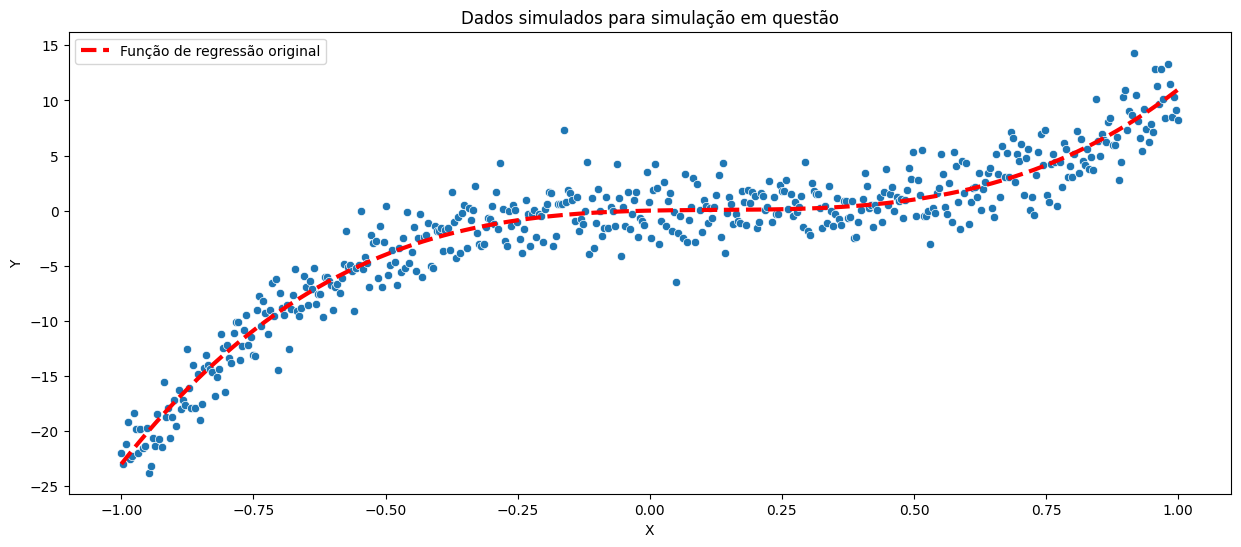

In [2]:
np.random.seed(42)

X = np.linspace(start = -1, stop = 1, num = 500)
epsilon = norm.rvs(loc = 0, scale = 2, size = 500)

Y = 16* (X ** 3) - 6 * (X ** 2) + X + epsilon

f = lambda X :  16* (X ** 3) - 6 * (X ** 2) + X # Função de regressão real

plt.figure(figsize = (15,6))
sns.scatterplot(x = X, y = Y, zorder = 9)
sns.lineplot(x = X, y = f(X), color = 'red', linewidth = 3, linestyle = '--', label = 'Função de regressão original', zorder = 10)

# Layout do gráfico da modelagem
plt.title('Dados simulados para simulação em questão')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [3]:
# Iniciamos o DataFrame sem nenhuma métrica para ser atualizado durante as simulações
df_simulacao = pd.DataFrame(
    {
        'Mean Squared Error (MSE)': {'Regressão Linear' : 0, 'Regressão Linear Grau 2' : 0, 'Regressão Linear Grau 3' : 0, 'Árvore de Regressão' : 0, 'Random Forests' : 0},
        'Mean Absolute Error (MAE)': {'Regressão Linear' : 0, 'Regressão Linear Grau 2' : 0, 'Regressão Linear Grau 3' : 0, 'Árvore de Regressão' : 0, 'Random Forests' : 0},
        'Viés': {'Regressão Linear' : 0, 'Regressão Linear Grau 2' : 0, 'Regressão Linear Grau 3' : 0, 'Árvore de Regressão' : 0, 'Random Forests' : 0},
        'Variância': {'Regressão Linear' : 0, 'Regressão Linear Grau 2' : 0, 'Regressão Linear Grau 3' : 0, 'Árvore de Regressão' : 0, 'Random Forests' : 0},
    }
)

df_simulacao

,Mean Squared Error (MSE),Mean Absolute Error (MAE),Viés,Variância
Regressão Linear,0,0,0,0
Regressão Linear Grau 2,0,0,0,0
Regressão Linear Grau 3,0,0,0,0
Árvore de Regressão,0,0,0,0
Random Forests,0,0,0,0


In [4]:
# Vamos então para a simulação.
lr_model_list = []
lr_degree2_model_list = []
lr_degree3_model_list = []
dtr_model_list = []
rfr_model_list = []

np.random.seed(7) # Fixa a seed para que toda vez que o código seja executado, os mesmos dados sejam gerados.
# Isso acontece ao executar a célula, dentro do loop novos dados serão gerados a cada interação.

df_simulacao = pd.DataFrame(
    {
        'Mean Squared Error (MSE)': {'Regressão Linear' : 0, 'Regressão Linear Grau 2' : 0, 'Regressão Linear Grau 3' : 0, 'Árvore de Regressão' : 0, 'Random Forests' : 0},
        'Mean Absolute Error (MAE)': {'Regressão Linear' : 0, 'Regressão Linear Grau 2' : 0, 'Regressão Linear Grau 3' : 0, 'Árvore de Regressão' : 0, 'Random Forests' : 0},
        'Viés': {'Regressão Linear' : 0, 'Regressão Linear Grau 2' : 0, 'Regressão Linear Grau 3' : 0, 'Árvore de Regressão' : 0, 'Random Forests' : 0},
        'Variância': {'Regressão Linear' : 0, 'Regressão Linear Grau 2' : 0, 'Regressão Linear Grau 3' : 0, 'Árvore de Regressão' : 0, 'Random Forests' : 0},
    }
)

n_simulacoes = 100
for simulacao in range(n_simulacoes):
    epsilon = norm.rvs(loc = 0, scale = 2, size = 500) # Para cada simulação, geraremos novos erros
    Y = 16* (X ** 3) - 6 * (X ** 2) + X + epsilon
    
    X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), Y, train_size = 0.7)
    
    # Prepara os dados de treino e teste para serem ajustados em modelos de regressão polinomiais de grau 2 e 3, respectivamente.
    X_train_degree2 = PolynomialFeatures(degree = 2).fit_transform(X_train)
    X_test_degree2 = PolynomialFeatures(degree = 2).fit_transform(X_test)
    
    X_train_degree3 = PolynomialFeatures(degree = 3).fit_transform(X_train)
    X_test_degree3 = PolynomialFeatures(degree = 3).fit_transform(X_test)
    
    # Define os modelos que serão ajustados
    lr = LinearRegression()
    lr_degree2 = LinearRegression()
    lr_degree3 = LinearRegression()
    dtr = DecisionTreeRegressor()
    rfr = RandomForestRegressor()
    
    # Ajusta cada modelo no conjunto de treinamento
    lr.fit(X_train, y_train)
    lr_degree2.fit(X_train_degree2, y_train)
    lr_degree3.fit(X_train_degree3, y_train)
    dtr.fit(X_train, y_train)
    rfr.fit(X_train, y_train)
    
    # Realiza as previsões no conjunto de teste
    lr_pred = lr.predict(X_test)
    lr_degree2_pred = lr_degree2.predict(X_test_degree2)
    lr_degree3_pred = lr_degree3.predict(X_test_degree3)
    dtr_pred = dtr.predict(X_test)
    rfr_pred = rfr.predict(X_test)
    
    # Valores do conjunto de treinamento aplicados a função de regressão real
    f_x = f(X_test)
    
    # Soma o valor MSE ao DataFrame de simulações
    df_simulacao.loc['Regressão Linear', 'Mean Squared Error (MSE)'] += mean_squared_error(y_test, lr_pred)
    df_simulacao.loc['Regressão Linear Grau 2', 'Mean Squared Error (MSE)'] += mean_squared_error(y_test, lr_degree2_pred)
    df_simulacao.loc['Regressão Linear Grau 3', 'Mean Squared Error (MSE)'] += mean_squared_error(y_test, lr_degree3_pred)
    df_simulacao.loc['Árvore de Regressão', 'Mean Squared Error (MSE)'] += mean_squared_error(y_test, dtr_pred)
    df_simulacao.loc['Random Forests', 'Mean Squared Error (MSE)'] += mean_squared_error(y_test, rfr_pred)
    
    # Soma o valor MAE ao DataFrame de simulações
    df_simulacao.loc['Regressão Linear', 'Mean Absolute Error (MAE)'] += mean_absolute_error(y_test, lr_pred)
    df_simulacao.loc['Regressão Linear Grau 2', 'Mean Absolute Error (MAE)'] += mean_absolute_error(y_test, lr_degree2_pred)
    df_simulacao.loc['Regressão Linear Grau 3', 'Mean Absolute Error (MAE)'] += mean_absolute_error(y_test, lr_degree3_pred)
    df_simulacao.loc['Árvore de Regressão', 'Mean Absolute Error (MAE)'] += mean_absolute_error(y_test, dtr_pred)
    df_simulacao.loc['Random Forests', 'Mean Absolute Error (MAE)'] += mean_absolute_error(y_test, rfr_pred)
    
    # Soma os vieses estimados em relação ao preditor real
    df_simulacao.loc['Regressão Linear', 'Viés'] += np.sum(f_x - lr_pred)/len(X_test)
    df_simulacao.loc['Regressão Linear Grau 2', 'Viés'] += np.sum(f_x - lr_degree2_pred)/len(X_test)
    df_simulacao.loc['Regressão Linear Grau 3', 'Viés'] += np.sum(f_x - lr_degree3_pred)/len(X_test)
    df_simulacao.loc['Árvore de Regressão', 'Viés'] += np.sum(f_x - dtr_pred)/len(X_test)
    df_simulacao.loc['Random Forests', 'Viés'] += np.sum(f_x - rfr_pred)/len(X_test)
    
    # Soma as variâncias a matriz de simulação
    df_simulacao.loc['Regressão Linear', 'Variância'] += np.sum((lr_pred - np.mean(lr_pred))** 2)/len(X_test)
    df_simulacao.loc['Regressão Linear Grau 2', 'Variância'] += np.sum((lr_degree2_pred - np.mean(lr_degree2_pred)) ** 2)/len(X_test)
    df_simulacao.loc['Regressão Linear Grau 3', 'Variância'] += np.sum((lr_degree3_pred - np.mean(lr_degree3_pred)) ** 2)/len(X_test)
    df_simulacao.loc['Árvore de Regressão', 'Variância'] += np.sum((dtr_pred - np.mean(dtr_pred)) ** 2)/len(X_test)
    df_simulacao.loc['Random Forests', 'Variância'] += np.sum((rfr_pred - np.mean(rfr_pred)) ** 2)/len(X_test)
    
    # Salva os modelos dentro de uma lista
    
    lr_model_list.append(lr)
    lr_degree2_model_list.append(lr_degree2)
    lr_degree3_model_list.append(lr_degree3)
    dtr_model_list.append(dtr)
    rfr_model_list.append(rfr)

In [5]:
df_simulacao_resultado = (df_simulacao / n_simulacoes)

df_simulacao_resultado.sort_values('Mean Squared Error (MSE)').style.set_caption('Valor médio de cada métrica em um estudo de 100 simulações para os modelos utilizados')

,Mean Squared Error (MSE),Mean Absolute Error (MAE),Viés,Variância
Regressão Linear Grau 3,3.944517,1.582048,-1.651797,45.812294
Random Forests,5.753322,1.914138,-0.681708,47.646942
Árvore de Regressão,7.866018,2.240342,-0.149441,49.720122
Regressão Linear Grau 2,9.942759,2.556442,3.121769,40.497890
Regressão Linear,13.133338,2.873945,5.884537,37.634875


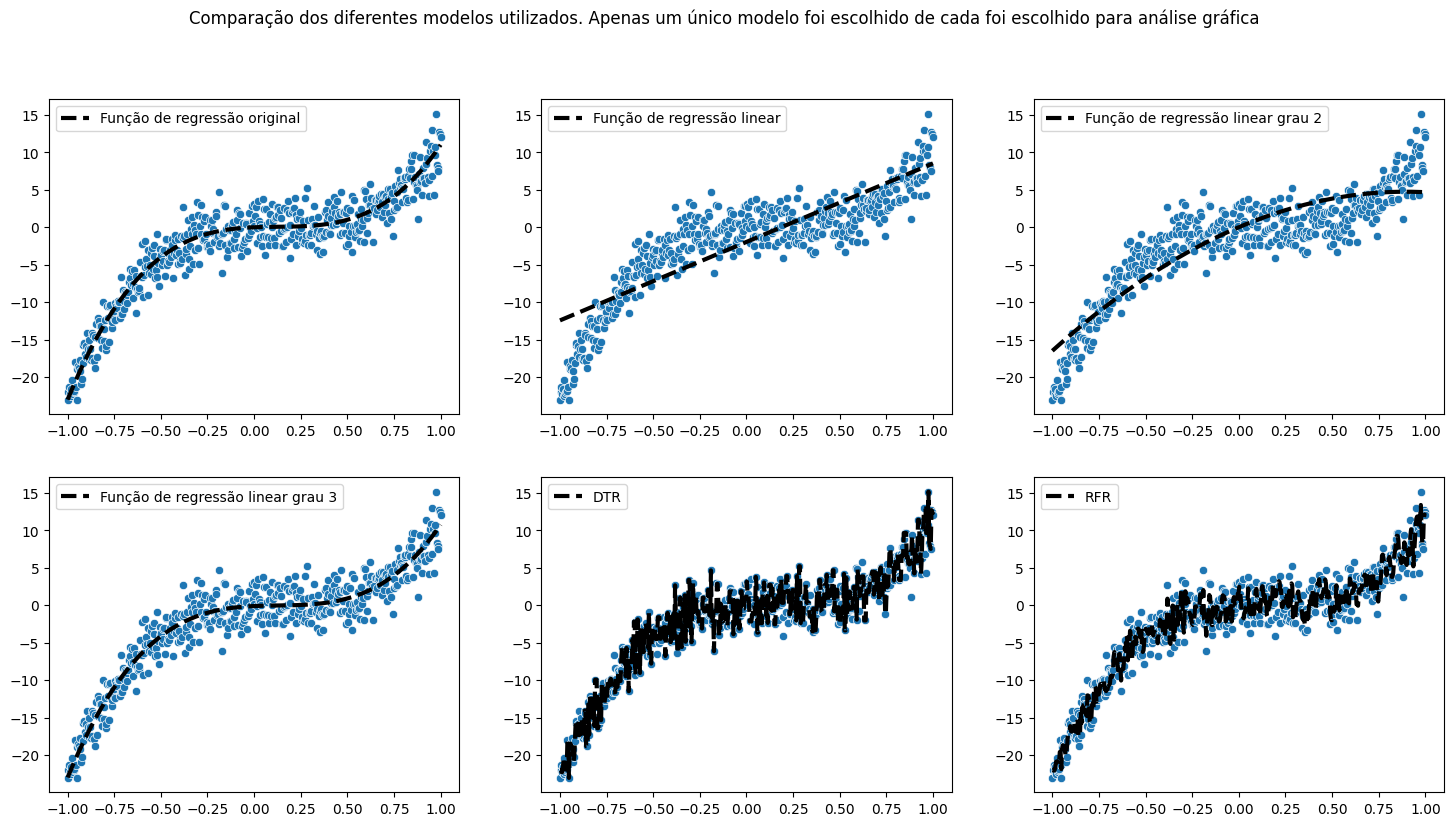

In [6]:
plt.figure(figsize = (18, 9))

X = np.linspace(start = -1, stop = 1, num = 500)

ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 3, 4)
ax5 = plt.subplot(2, 3, 5)
ax6 = plt.subplot(2, 3, 6)

sns.scatterplot(x = X, y = Y, zorder = 9, ax = ax1)
sns.scatterplot(x = X, y = Y, zorder = 9, ax = ax2)
sns.scatterplot(x = X, y = Y, zorder = 9, ax = ax3)
sns.scatterplot(x = X, y = Y, zorder = 9, ax = ax4)
sns.scatterplot(x = X, y = Y, zorder = 9, ax = ax5)
sns.scatterplot(x = X, y = Y, zorder = 9, ax = ax6)


plt.suptitle('Comparação dos diferentes modelos utilizados. Apenas um único modelo foi escolhido de cada foi escolhido para análise gráfica')
sns.lineplot(x = X, y = f(X), color = 'black', linewidth = 3, linestyle = '--', label = 'Função de regressão original', zorder = 10, ax = ax1)
sns.lineplot(x = X, y = lr.predict(X.reshape(-1, 1)), color = 'black', linewidth = 3, linestyle = '--', label = 'Função de regressão linear', zorder = 10, ax = ax2)
sns.lineplot(x = X, y = lr_degree2.predict(PolynomialFeatures(degree = 2).fit_transform(X.reshape(-1, 1))), color = 'black', linewidth = 3, linestyle = '--', label = 'Função de regressão linear grau 2', zorder = 10, ax = ax3)
sns.lineplot(x = X, y = lr_degree3.predict(PolynomialFeatures(degree = 3).fit_transform(X.reshape(-1, 1))), color = 'black', linewidth = 3, linestyle = '--', label = 'Função de regressão linear grau 3', zorder = 10, ax = ax4)
sns.lineplot(x = X, y = dtr.predict(X.reshape(-1, 1)), color = 'black', linewidth = 3, linestyle = '--', label = 'DTR', zorder = 10, ax = ax5)
sns.lineplot(x = X, y = rfr.predict(X.reshape(-1, 1)), color = 'black', linewidth = 3, linestyle = '--', label = 'RFR', zorder = 10, ax = ax6)


plt.show()